In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# allmodels = np.load('/home/cheng/BayHunter-master/CH018/results/data/c_models.npy')
# read the model that has the best fit with mode of layers
x_age, y_rsl = np.loadtxt('tutorial/results/best_mode_model.txt').T
# allmodels = allmodels[~np.isnan(allmodels)]
x_age, y_rsl, x_age[1:]-x_age[:-1]

(array([-476.        , -327.87704468, -308.55145264,  -26.66764259,
         -10.03769493,  252.26872253,  421.56564331,  464.03683472,
         562.91394043, 1092.42126465, 1369.48803711, 1844.72668457,
        1969.84484863, 2014.90161133]),
 array([-4.11480856, -3.9740653 , -3.80283928, -3.55608988, -3.28657341,
        -3.16654205, -2.62616348, -2.74681783, -2.42827392, -1.62013268,
        -1.35099852, -0.6498214 , -0.27960917,  0.05006293]),
 array([148.12295532,  19.32559204, 281.88381004,  16.62994766,
        262.30641747, 169.29692078,  42.47119141,  98.87710571,
        529.50732422, 277.06677246, 475.23864746, 125.11816406,
         45.0567627 ]))

In [3]:
station = 'NJ_CC.csv'
sea_level = pd.read_csv(station)
x_obs_raw = 1950-np.array(sea_level['Age'])
y_obs_raw = np.array(sea_level['RSL'])
sort_idx = np.argsort(x_obs_raw)
x_obs = x_obs_raw[sort_idx]
y_obs = y_obs_raw[sort_idx]

y_pred = np.interp(x_obs, x_age, y_rsl)

In [4]:
x_obs, y_pred

(array([-476, -455, -401, -339, -329, -319, -314, -307, -301, -292, -264,
        -240, -200, -124,  -87,  -53,  -40,  -19,   27,  148,  311,  335,
         387,  404,  409,  424,  457,  470,  477,  481,  490,  498,  505,
         514,  522,  533,  538,  551,  564,  573,  585,  604,  626,  666,
         685,  699,  708,  720,  732,  747,  767,  787,  804,  819,  835,
         849,  871,  907,  939,  967,  969,  994, 1009, 1010, 1024, 1029,
        1036, 1065, 1108, 1119, 1135, 1154, 1173, 1181, 1209, 1226, 1238,
        1248, 1255, 1286, 1294, 1318, 1323, 1420, 1463, 1509, 1521, 1532,
        1594, 1604, 1612, 1645, 1661, 1687, 1700, 1727, 1756, 1785, 1790,
        1803, 1829, 1861, 1864, 1867, 1873, 1877, 1882, 1887, 1894, 1904,
        1907, 1911, 1912, 1915, 1925, 1934, 1941, 1947, 1954, 1959, 1962,
        1965, 1967, 1969, 1971, 1975, 1978, 1983, 1986, 1987, 1988, 1989,
        1991, 1993, 1995, 2017]),
 array([-4.11480856, -4.09485481, -4.04354517, -3.9846341 , -3.97513231,
     

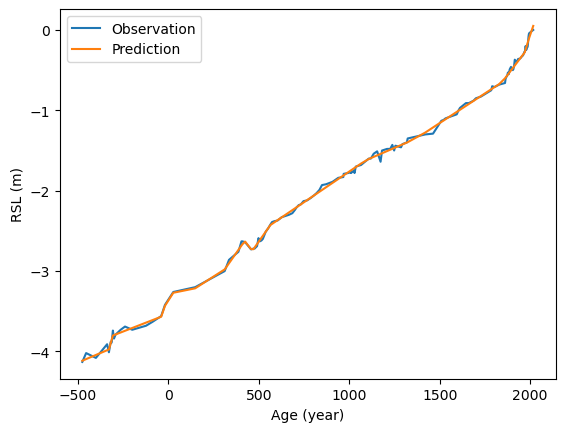

In [5]:
plt.plot(x_obs, y_obs, label = 'Observation')
plt.plot(x_obs, y_pred, label='Prediction')
plt.xlabel('Age (year)')
plt.ylabel('RSL (m)')
plt.legend()

Text(0, 0.5, 'RSL change rate (mm/year)')

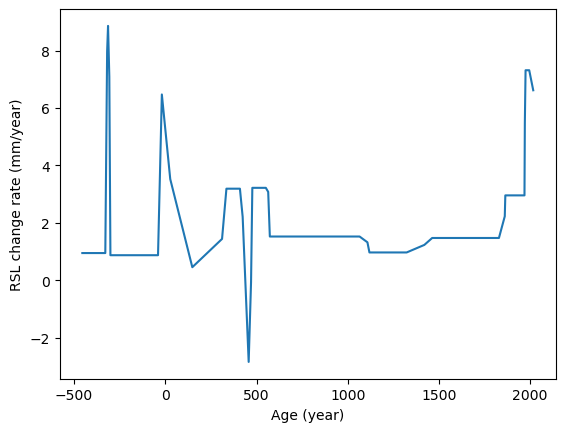

In [6]:
plt.plot(x_obs[1:], (y_pred[1:]-y_pred[:-1])/(x_obs[1:]-x_obs[:-1])*1000)
plt.xlabel('Age (year)')
plt.ylabel('RSL change rate (mm/year)')

The average rsl residual is 0.0016911230254467577


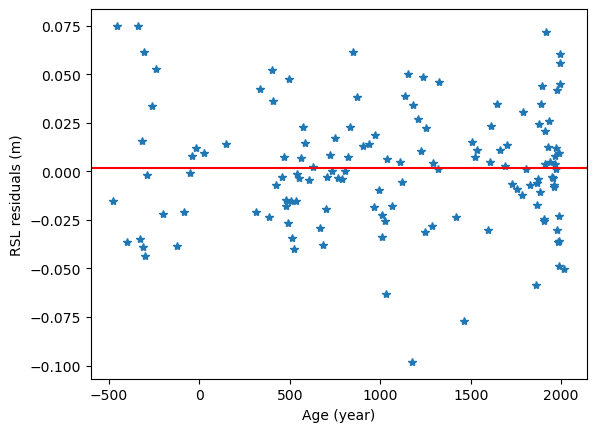

In [7]:
plt.plot(x_obs, y_obs-y_pred, '*')
plt.xlabel('Age (year)')
plt.ylabel('RSL residuals (m)')
print('The average rsl residual is', np.mean(y_obs-y_pred))
plt.axhline(np.mean(y_obs-y_pred), c='r')

Text(0.5, 0, 'Residuals')

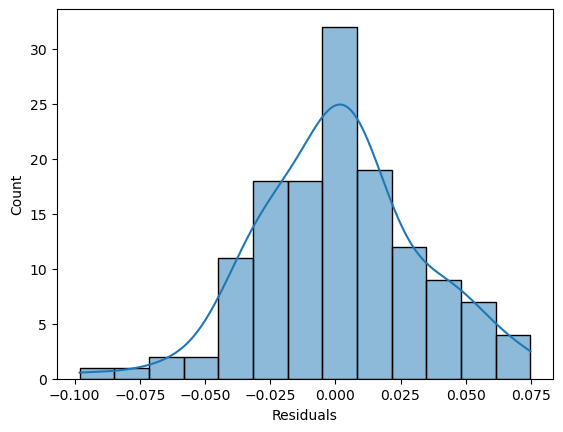

In [9]:
import seaborn as sns
sns.histplot(y_obs-y_pred, kde=True)
plt.xlabel('Residuals')

In [72]:
len(x_obs)

136